In [961]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime

In [962]:
df = pd.read_excel("Threshold_Data.xlsx")
# df = pd.read_excel("Cleaned_Data.xlsx")

In [963]:
df.count()

Unnamed: 0              2199
ID                      2199
Year_Birth              2199
Education               2199
Marital_Status          2199
Income                  2199
Kidhome                 2199
Teenhome                2199
Dt_Customer             2199
Recency                 2199
MntWines                2199
MntFruits               2199
MntMeatProducts         2199
MntFishProducts         2199
MntSweetProducts        2199
MntGoldProds            2199
NumDealsPurchases       2199
NumWebPurchases         2199
NumCatalogPurchases     2199
NumStorePurchases       2199
NumWebVisitsMonth       2199
Response                2199
Complain                2199
Age                     2199
Total_Spent             2199
BuyingPower             2199
HouseHoldMembers        2199
Total_Children          2199
TotalPurchases          2199
Dt_CustomerConverted    2199
SinceEnrolled           2199
CLV                     2199
AOV                     2199
dtype: int64

In [964]:
df.dropna(inplace=True)

In [965]:
one_hot_encode = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')

In [966]:
data = df[['Income', 'Total_Children', 'Marital_Status', 'Education', 'Response', 'TotalPurchases','Complain', 'NumWebVisitsMonth','CLV','Age', 'Complain', 'Total_Spent', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

# data = df[['Income', 'Kidhome', 'Teenhome', 'Marital_Status', 'Education', 'Response', 'Recency', 'TotalPurchases','Complain', 'NumWebVisitsMonth','BuyingPower','Age']]

data['Marital_Status'].unique()

array(['Single', 'Married', 'Together'], dtype=object)

In [967]:
data.count()

Income               2199
Total_Children       2199
Marital_Status       2199
Education            2199
Response             2199
TotalPurchases       2199
Complain             2199
NumWebVisitsMonth    2199
CLV                  2199
Age                  2199
Complain             2199
Total_Spent          2199
MntWines             2199
MntFruits            2199
MntMeatProducts      2199
MntFishProducts      2199
MntSweetProducts     2199
MntGoldProds         2199
dtype: int64

In [968]:
ohe_marital = one_hot_encode.fit_transform(data[['Marital_Status']])
column_names = [f"{col}_{val}" for col, val in zip(['Marital_Status'] * ohe_marital.shape[1], one_hot_encode.get_feature_names_out())]
ohe_education = one_hot_encode.fit_transform(data[['Education']])
data = data.drop(['Marital_Status', 'Education'], axis=1)
data = pd.concat([data, ohe_education], axis=1)
data = pd.concat([data, ohe_marital], axis=1)

# Baseline Modelling

In [969]:
X = data.drop('Response', axis=1).iloc[:,1:]


In [970]:
y = data['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [971]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [972]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
preds = classifier.predict(scaler.transform(X_test))

In [973]:
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
auc = roc_auc_score(y_test, preds)

In [974]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.7758
Precision: 0.3533
Recall: 0.5960
F1: 0.4436
AUC: 0.7017


In [975]:
print(len(preds))

660


# Figures

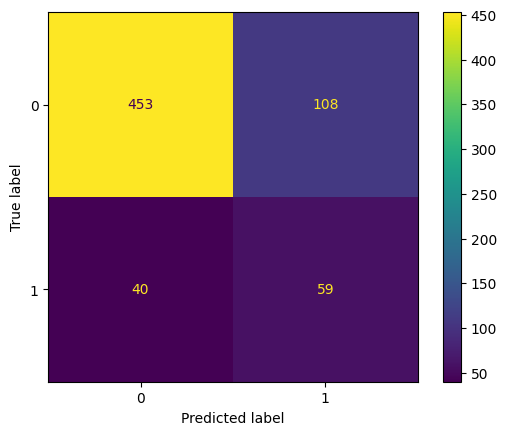

In [976]:
actual = y_test
predicted = preds


confusion_matrix = confusion_matrix(actual, predicted, labels=classifier.classes_)
# Normalize the confusion matrix to get probabilities
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = classifier.classes_)
cm_display.plot()
plt.show()